# ¿Qué tipo de zonas tienen mayor demanda y qué factores influyen en esto?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos limpios
df = pd.read_csv('datos_limpios.csv')

In [15]:
# 🔹 Ver resumen de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_propiedad     8319 non-null   int64  
 1   zona             8319 non-null   object 
 2   piso             8319 non-null   int64  
 3   estrato          8319 non-null   int64  
 4   precio_millones  8319 non-null   float64
 5   area_construida  8319 non-null   float64
 6   parqueaderos     8319 non-null   int64  
 7   banios           8319 non-null   int64  
 8   habitaciones     8319 non-null   int64  
 9   tipo_vivienda    8319 non-null   object 
 10  barrio           8319 non-null   object 
 11  longitud         8319 non-null   float64
 12  latitud          8319 non-null   float64
 13  id_comentarios   8319 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 910.0+ KB
None


In [16]:
print(df.head(10))

   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0          8312  zona oeste     4        6           1300.0            318.0   
1          8311  zona oeste     1        6            480.0            300.0   
2          8307  zona oeste     4        5           1200.0            800.0   
3          8296    zona sur     2        3            220.0            150.0   
4          8297  zona oeste     4        5            330.0            112.0   
5          8298    zona sur     4        5           1350.0            390.0   
6          8299    zona sur     2        6            305.0            125.0   
7          8300  zona oeste     4        5            480.0            280.0   
8          8286    zona sur     4        5            275.0             74.0   
9          8287    zona sur     2        5            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0             2       4             2   aparta

## 1️⃣ Comparar cantidad de propiedades en venta por zona
📌 Objetivo: Identificar qué zonas tienen más propiedades en venta y entender si esto es por alta demanda o por sobreoferta.

C:\Users\guerr\AppData\Local\Temp\ipykernel_23424\2852378422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=propiedades_por_zona.index, y=propiedades_por_zona.values, palette="viridis")


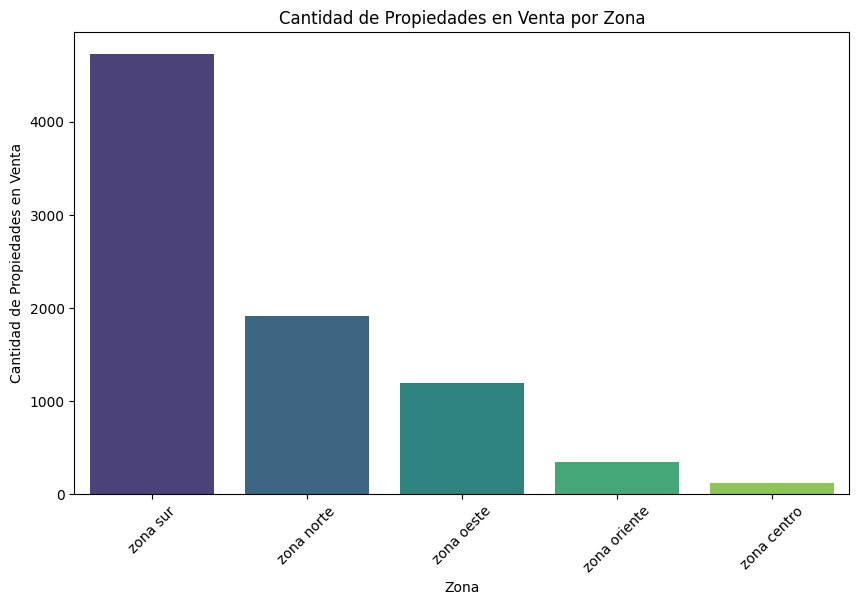

In [17]:
# Contar cantidad de propiedades por zona
propiedades_por_zona = df["zona"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=propiedades_por_zona.index, y=propiedades_por_zona.values, palette="viridis")

# Personalización del gráfico
plt.xlabel("Zona")
plt.ylabel("Cantidad de Propiedades en Venta")
plt.title("Cantidad de Propiedades en Venta por Zona")
plt.xticks(rotation=45)
plt.show()

## 2️⃣ Relación entre precios y cantidad de propiedades en venta
📌 Objetivo: Ver si las zonas con más demanda son costosas o accesibles.

C:\Users\guerr\AppData\Local\Temp\ipykernel_23424\2121491475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio.index, y=precio_promedio.values, palette="coolwarm")


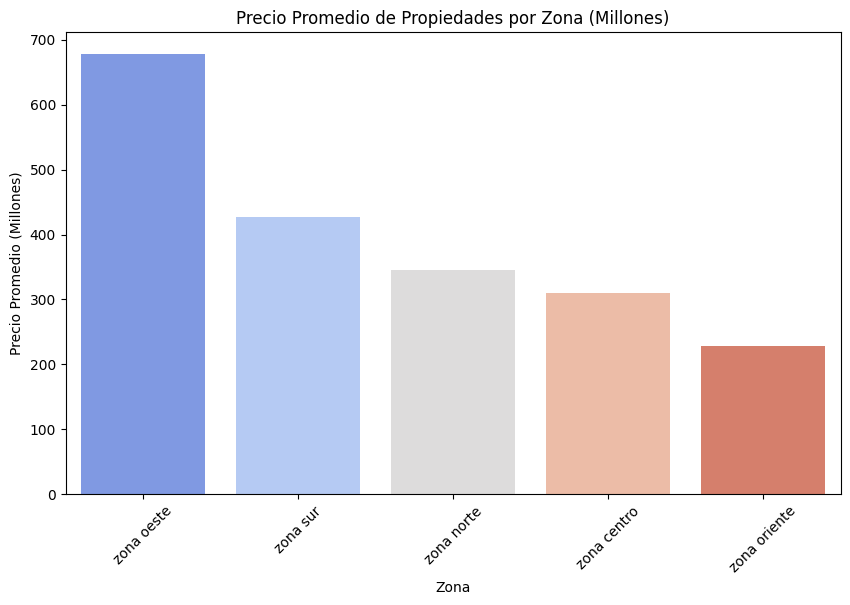

In [19]:
plt.figure(figsize=(10, 6))
precio_promedio = df.groupby("zona")["precio_millones"].mean().sort_values(ascending=False)
sns.barplot(x=precio_promedio.index, y=precio_promedio.values, palette="coolwarm")
plt.title("Precio Promedio de Propiedades por Zona (Millones)")
plt.xlabel("Zona")
plt.ylabel("Precio Promedio (Millones)")
plt.xticks(rotation=45)
plt.show()

## 3️⃣ Evaluar el impacto del estrato en la demanda
📌 Objetivo: Determinar qué nivel socioeconómico está más relacionado con la demanda de vivienda.

C:\Users\guerr\AppData\Local\Temp\ipykernel_23424\2998989365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estrato_promedio.index, y=estrato_promedio.values, palette="mako")


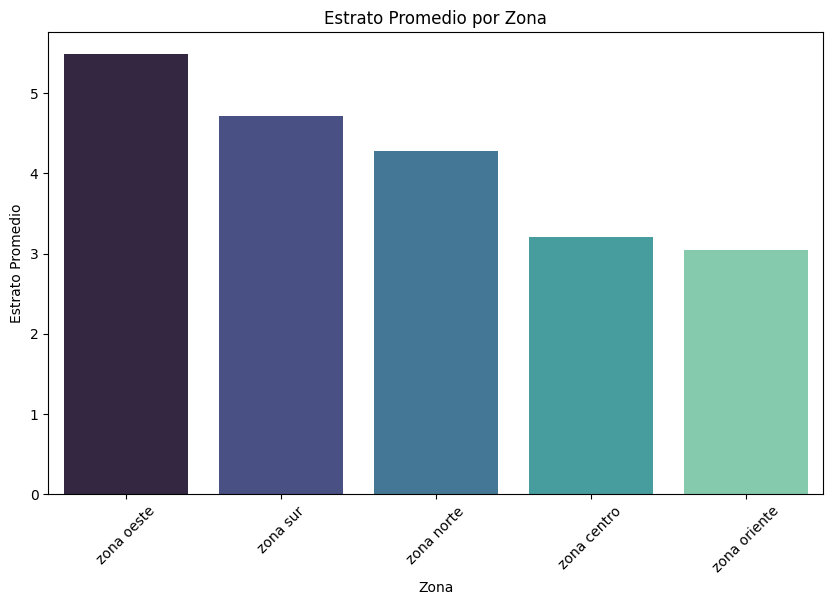

In [21]:
plt.figure(figsize=(10, 6))
estrato_promedio = df.groupby("zona")["estrato"].mean().sort_values(ascending=False)
sns.barplot(x=estrato_promedio.index, y=estrato_promedio.values, palette="mako")
plt.title("Estrato Promedio por Zona")
plt.xlabel("Zona")
plt.ylabel("Estrato Promedio")
plt.xticks(rotation=45)
plt.show()

## 4️⃣ ¿Influye el tipo de vivienda y el tamaño en la demanda?
📌 Objetivo: Analizar si las propiedades más vendidas son apartamentos o casas y si el área construida influye en el interés de compra.

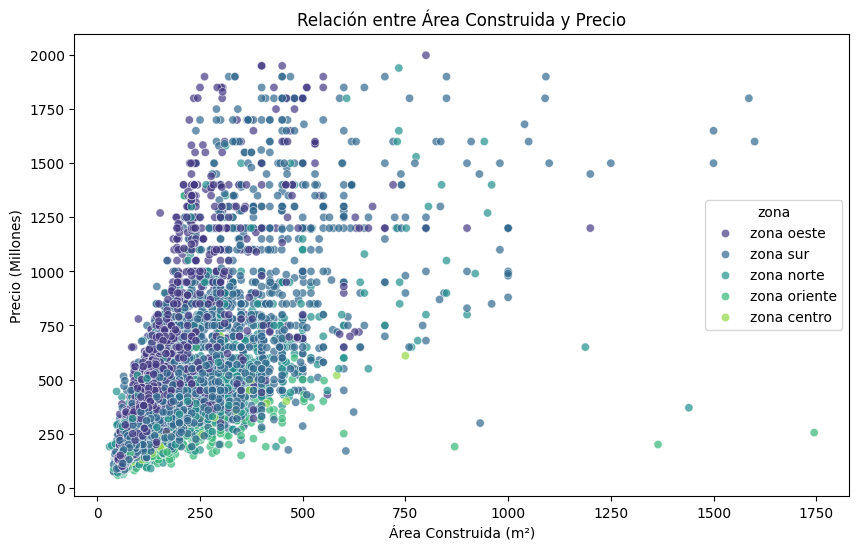

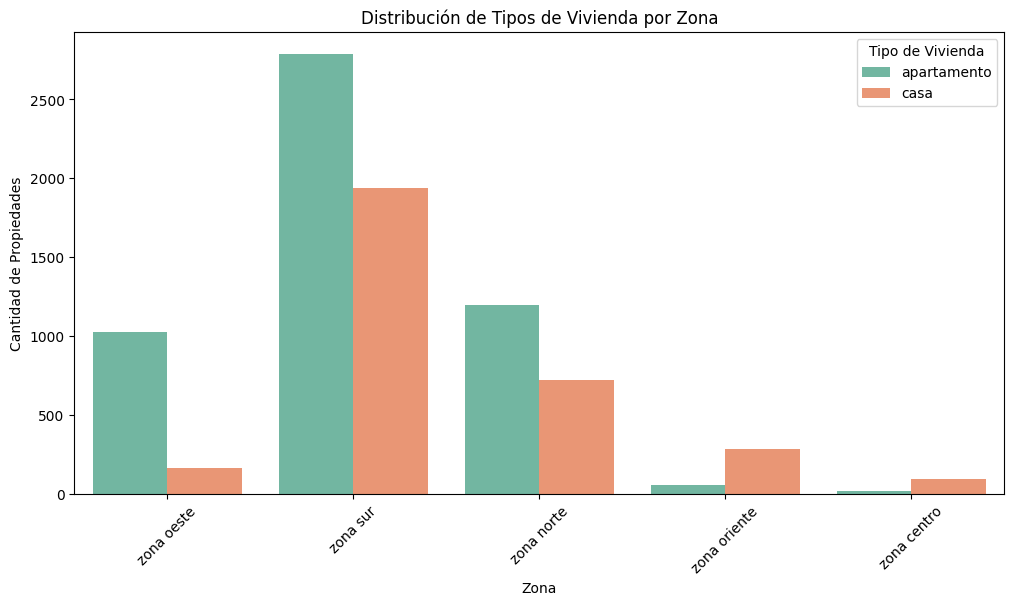

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["area_construida"], y=df["precio_millones"], hue=df["zona"], palette="viridis", alpha=0.7)
plt.title("Relación entre Área Construida y Precio")
plt.xlabel("Área Construida (m²)")
plt.ylabel("Precio (Millones)")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="zona", hue="tipo_vivienda", palette="Set2")
plt.title("Distribución de Tipos de Vivienda por Zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Propiedades")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Vivienda")
plt.show()


## 6️⃣ Conclusión Final
A partir del análisis de las diferentes zonas y sus características, se identifica que la zona sur presenta la mayor demanda en el mercado inmobiliario. Esto se debe a una combinación de factores clave, entre los que destacan su alto estrato socioeconómico, la diversificación en tipos de vivienda y una relación equilibrada entre el tamaño de las propiedades y su precio.

La zona sur se caracteriza por contar con barrios bien urbanizados, mayor presencia de negocios y una infraestructura consolidada, lo que la hace altamente atractiva para compradores e inversionistas. A pesar de ser un sector con precios elevados, se observa que la oferta de viviendas es variada, lo que permite que distintos perfiles de compradores puedan encontrar opciones adecuadas a su presupuesto.

Desde un punto de vista cuantitativo, las gráficas muestran que la relación entre el área construida y el precio es más estable en comparación con otras zonas, lo que sugiere que el mercado inmobiliario en este sector se rige por criterios más homogéneos y predecibles. Además, la mayor cantidad de propiedades registradas en esta zona indica un mercado dinámico con alta competencia, lo que contribuye a mantener precios justos y accesibles dentro de su rango de estrato.

En comparación con otras zonas:

El norte y el oriente presentan menor oferta y una mayor variabilidad en la relación entre precio y tamaño, lo que puede traducirse en menor estabilidad en el mercado.
El centro parece estar más orientado a actividades comerciales que residenciales, reduciendo su atractivo para quienes buscan vivienda.
En conclusión, la zona sur no solo destaca por su alta demanda, sino también por ofrecer una combinación equilibrada de accesibilidad, calidad de vida y diversidad en la oferta inmobiliaria, lo que la convierte en la opción más favorable dentro del mercado analizado.